#Предыдущие результаты, которые понадобятся в этом ноутбуке

In [1]:
import numpy as np  

import seaborn as sns

In [2]:
np.random.seed(1)

Сгенерируем выборку

In [3]:
def linear_func(x):
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [4]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [5]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [6]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[-1.83756546 -1.56117564 -1.05281718 -0.60729686  0.08654076  0.26984613
  1.17448118  1.42387931  2.03190391  2.47506296  3.14621079]


In [10]:
def MSE_loss(target, predict):
    return ((target - predict)**2).mean()

================================================================================
# Начало скринкаста 6
================================================================================

In [7]:
class OneLinearLearnableNeuron:

    def __init__(self, w, b):
        self.w = np.array(w)
        self.b = np.array(b)

        self.n_iter = 500
        self.lr = 0.1
    
    def calc_grad_w(self, x, y):
        return -2 * np.array(y) @ np.array(x) + \
        2 * (self.w @ np.array(x) + self.b) @ np.array(x).T

    def calc_grad_b(self, x, y):
        return -2 * np.array(y) + 2 * (self.w @ np.array([x]) + self.b)

    def calc_loss(self, target, predict):
        return MSE_loss(np.array(target).reshape(1, -1),\
                        np.array(predict).reshape(1, -1))

    def apply(self, x):
        return self.w * np.array(x) + self.b
    
    def train(self, x, y):
        loss_hist = []
        for i in range(self.n_iter):
            current_predict = [self.apply(np.array(item)) for item in x]
            loss_hist.append(self.calc_loss(current_predict, y))
            for item in range(len(x)):
                self.w = self.w - \
                self.lr * self.calc_grad_w([x[item]], [y[item]]) / len(x)
                self.b = self.b - \
                self.lr * self.calc_grad_b([x[item]], [y[item]]) / len(x)
        return loss_hist

    def print_weights(self):
        print('Neuron: w = {}, b = {}'.format(self.w, self.b))

In [8]:
neuron = OneLinearLearnableNeuron([3], [0])

print(neuron.apply([0]))

print(neuron.calc_grad_w([0], [-2]))
print(neuron.calc_grad_b([0], [-2]))


[0]
0
[4]


[-1.99956244]
Neuron: w = [4.99922694], b = [-1.99956244]


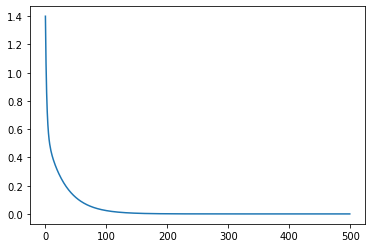

In [11]:
losses = neuron.train(xes, target_ys)

sns.lineplot(
    data=losses
)
print(neuron.apply([0]))

neuron.print_weights()

================================================================================
# Конец скринкаста 6
================================================================================